In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

%matplotlib inline
%matplotlib inline
import seaborn as sns


In [3]:
!python --version


Python 3.14.0


In [4]:
import sys
print(sys.version)


3.14.0 | packaged by Anaconda, Inc. | (main, Oct 22 2025, 08:58:42) [MSC v.1929 64 bit (AMD64)]


In [5]:
from sklearn.datasets import fetch_openml

# fetch once
boston = fetch_openml(name="boston", version=1, as_frame=True)

# build dictionary
boston_dict = {
    "data": boston.data,
    "target": boston.target.astype(float),
    "frame": boston.frame,
    "feature_names": list(boston.data.columns),
    "target_names": ["MEDV"],
    "DESCR": boston.DESCR
}


## Describing data

In [6]:
boston_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR'])

In [7]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [8]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [9]:
len(boston.feature_names)

13

In [10]:
print(boston.data)


        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [11]:
print(boston.target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


### Preparing The Dataset

In [12]:
boston_ds = pd.DataFrame(boston.data)

In [13]:
boston_ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [14]:
boston_ds["Price"]=boston.target

In [15]:
boston_ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
boston_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


### Summarizing The Stats of the data
 - #### this describe will only give for numerical features , not the categorical features. ex:CHAS & RAD   

In [17]:
boston_ds.describe() ## this will only give for numerical features , not the categorical features. ex:CHAS & RAD      

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
boston_ds.isnull() # reuslts a boolean value ==> True for null 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
boston_ds.isnull().sum()  # ==> no null values at all

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### Exploratory Data Analysis
#### Correlation - very important

In [20]:
boston_ds.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


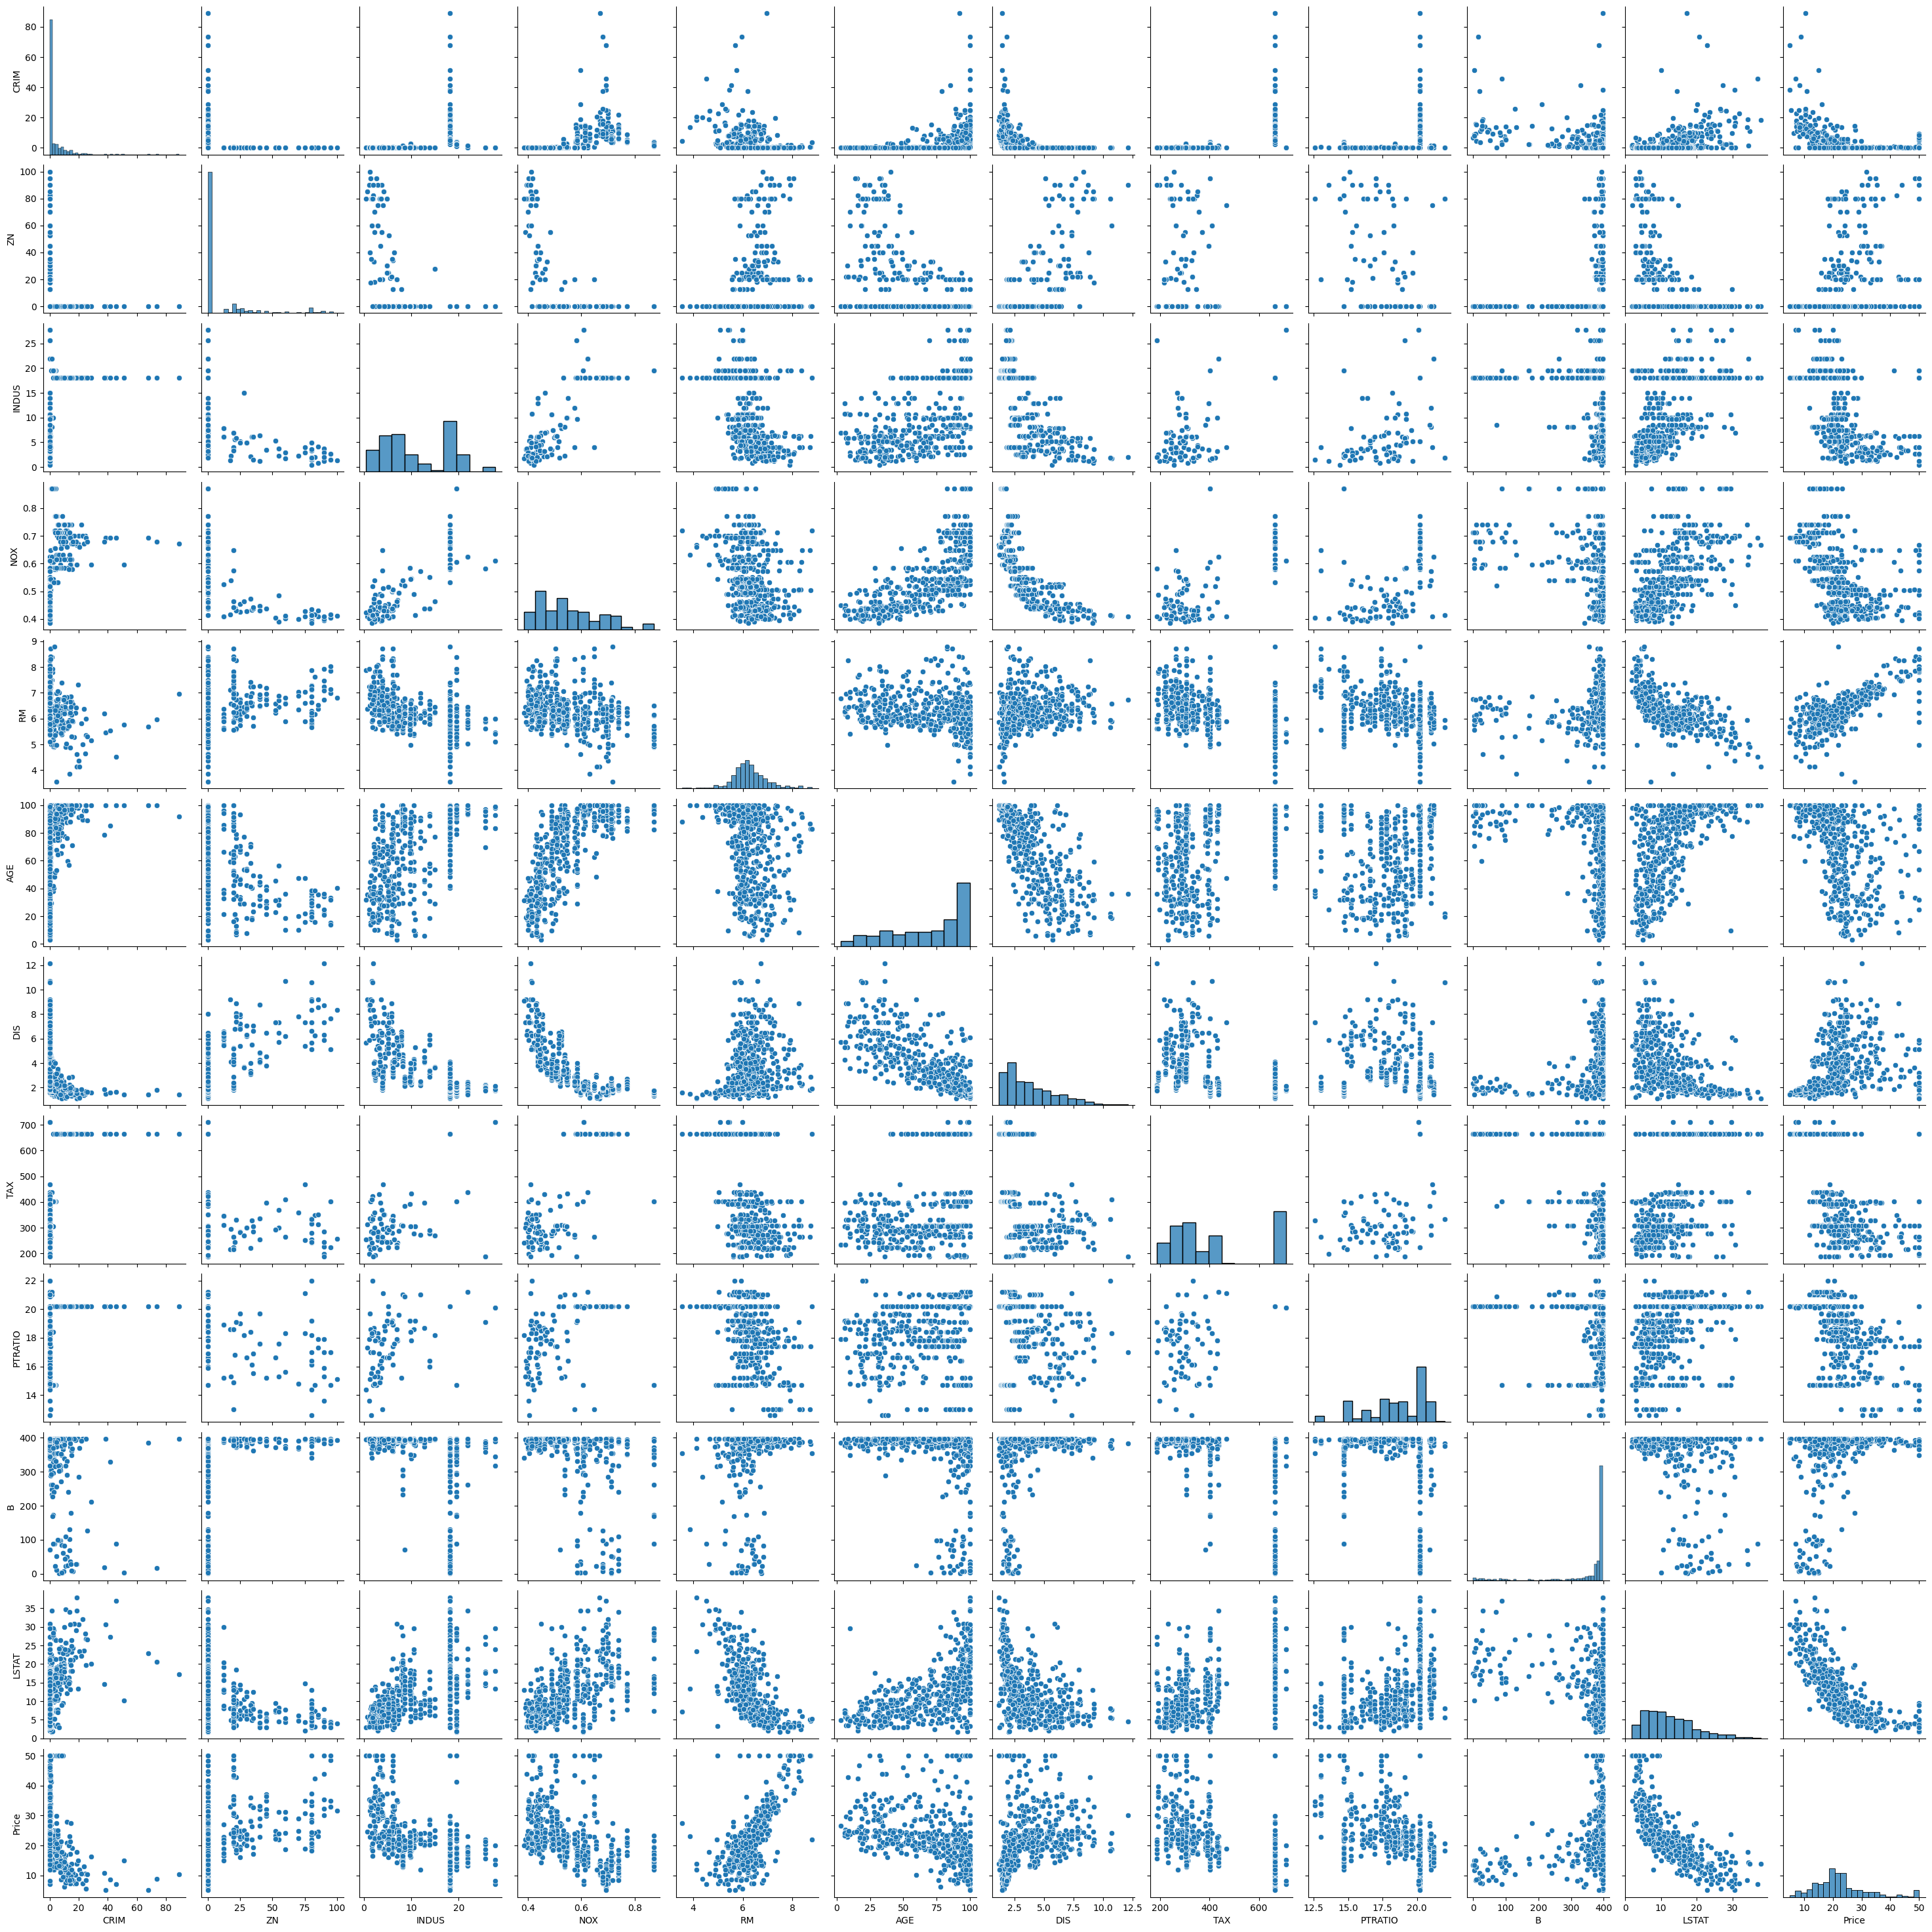

In [21]:
sns.pairplot(boston_ds)

In [22]:
plt.show()

## Analyzing The Correlated Features

In [23]:
boston_ds.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Plotting

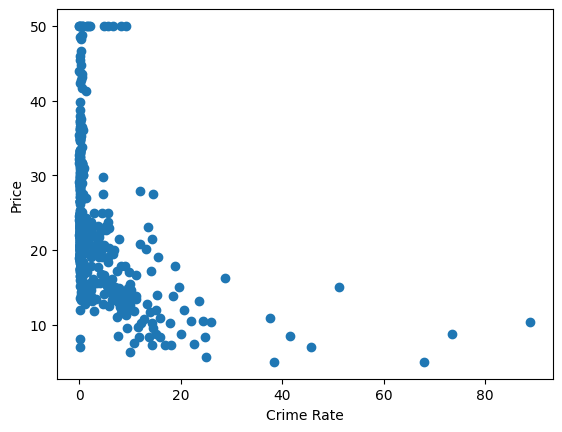

In [24]:
plt.scatter(boston_ds['CRIM'],boston_ds['Price'])

plt.xlabel("Crime Rate")
plt.ylabel("Price")
plt.show()

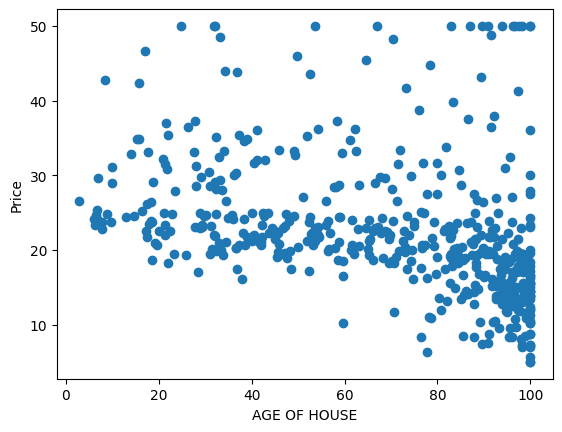

In [25]:
plt.scatter(boston_ds['AGE'],boston_ds['Price'])
plt.xlabel("AGE OF HOUSE")
plt.ylabel("Price")

plt.show()

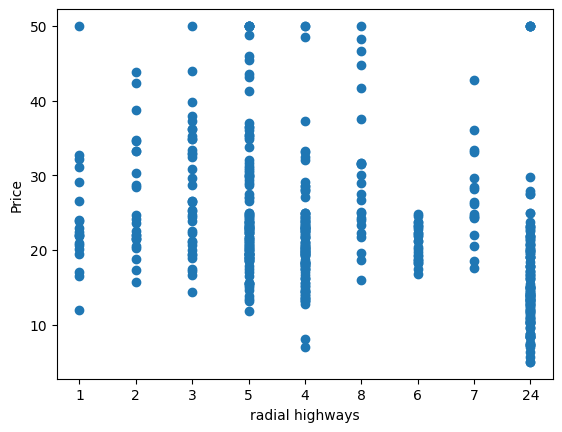

In [26]:
plt.scatter(boston_ds['RAD'],boston_ds['Price'])
plt.xlabel("radial highways")
plt.ylabel("Price")
plt.show() # categorical feature

In [27]:
boston_ds.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

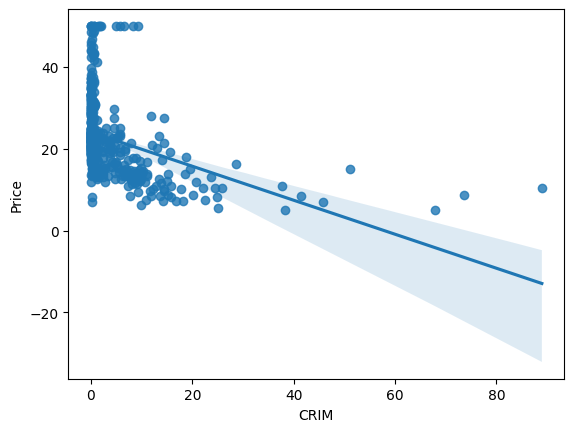

In [28]:
sns.regplot(x='CRIM', y = 'Price', data=boston_ds)
plt.show()

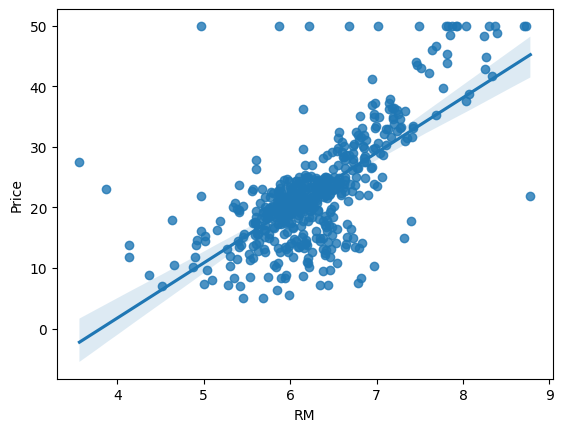

In [29]:
sns.regplot(x='RM', y = 'Price', data=boston_ds)
plt.show()

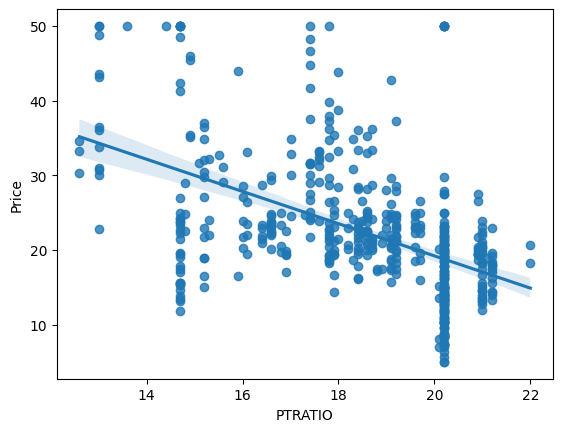

In [30]:
sns.regplot(x='PTRATIO', y = 'Price', data=boston_ds)
plt.show()

### IDV & DV Split

In [31]:
# IDV & DV

X = boston_ds.iloc[:,:-1]
X.head()

y = boston_ds.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

### Train test split

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13


### Standardization 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train) # learn + apply
X_test = scaler.transform(X_test)  # apply only

In [35]:
print(X_train)

[[-0.41425879 -0.50512499 -1.29214218 ...  0.18727079  0.39651419
  -1.01531611]
 [-0.40200818 -0.50512499 -0.16208345 ... -0.21208981  0.3870674
  -0.05366252]
 [-0.39721053 -0.50512499 -0.60948856 ... -0.16771641  0.42854113
  -0.31132373]
 ...
 [-0.41604586  3.03838247 -1.3166773  ... -0.56707702  0.35987906
  -0.90549329]
 [ 0.92611293 -0.50512499  1.00549958 ...  0.8528718  -2.87841346
   1.52750437]
 [-0.39030549 -0.50512499 -0.37135358 ...  1.16348561 -3.32828832
  -0.25218837]]


In [36]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]], shape=(152, 13))

In [69]:
#pickling
"""
Pickling is the process of saving a Python object into a file (or a byte stream) so that you can use it later.
Think of it as packing your Python object into a suitcase to store it or send it somewhere.

Example objects: lists, dictionaries, sets, custom objects, etc.

After pickling, the object is converted into a special format that Python can understand later.
"""


import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

## Model Training

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model =LinearRegression()

In [39]:
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [40]:
## Print the coefficents & intercept

print(model.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [41]:
print(model.intercept_)

23.01581920903955


In [42]:
## On which parameters the model has been trained
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

### Predictions with test data

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

### pred vs actual --Assumptions

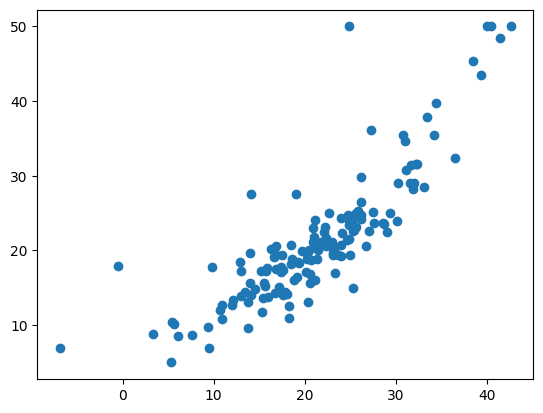

In [45]:
# Scatter plot for prediction -- pred vs test
plt.scatter(y_pred,y_test)
plt.show()

- plotting is linear means the model has performed well

In [46]:
### Residuals -- error wrt pred and actual

residuals = y_test - y_pred
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: Price, Length: 152, dtype: float64

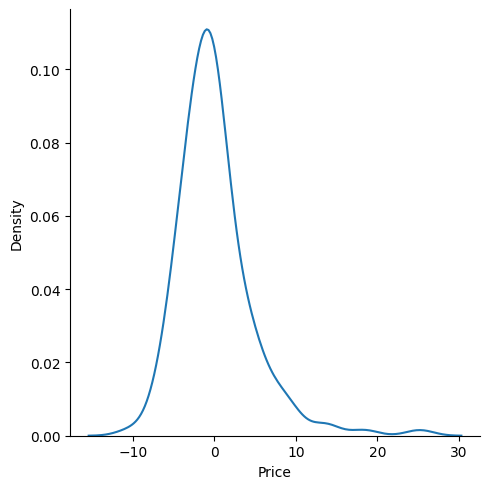

In [47]:
## Plottinf residual

sns.displot(residuals, kind  ='kde')


In [48]:
plt.show()

-this looks like a nomal distribution but on the right hand side the errors are bit high

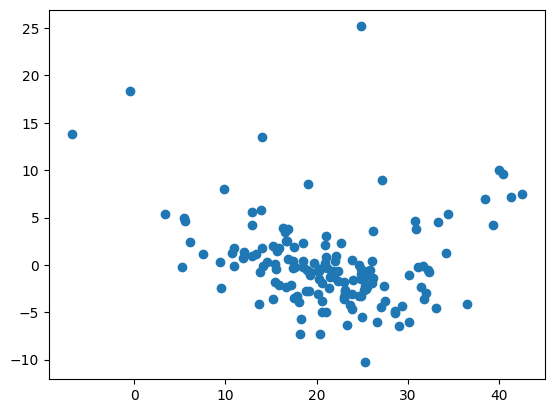

In [49]:
### Scatter plot wrt pred and residuals
plt.scatter(y_pred, residuals)
plt.show()

- uniform distribution wrt predictions and residuals -- model is performing well

## Performance Metrics

In [50]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

3.1627098714574053
21.517444231177205


In [51]:
# Rmse
print(np.sqrt(mean_squared_error(y_test, y_pred)))

4.6386899261728205


### R- square , adjusted R square

Formula

**R square = 1- (ssr/sst)**

- R^2 is the coefficiednt of determination
- SSR is sum of squares of residuals
- SST is total sum of sqares

In [52]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

0.7112260057484934


- 71% is good -- more it s towards 1 - better the model



### Adjusted R^2

we dont have models for this , so we use the formula

**Adjusted R^2 = 1-[(1-R2)*(n-1)/(n-k-1)]**

- R2 is the r2 score of the model
- n=no of observations
- k =  the no. of predictor variable 



In [53]:
n=len(y_test)
n

152

In [54]:
k=X_test.shape
print(k)
k=k[1]
print(k) 

(152, 13)
13


In [55]:
adj_r2 = 1-(((1-score)*(n-1))/(n-k-1))
print(adj_r2)

0.6840226584639312


adj r2 is 68 and it is less than r2 so good

## New Data prediction

In [56]:
boston_dict['data']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [57]:
new_house  = boston.data.iloc[[1]]

In [58]:
new_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14


In [59]:
print(type(new_house))     # DataFrame
new_house.shape 

<class 'pandas.core.frame.DataFrame'>


(1, 13)

In [60]:
new_house  = scaler.transform(new_house)

In [61]:
new_house

array([[-0.41456466, -0.50512499, -0.58639669, -0.28154625, -0.75676687,
         0.13273241,  0.36560445,  0.5658082 , -0.862084  , -0.99251596,
        -0.21208981,  0.42854113, -0.4619781 ]])

In [62]:
predicted_price =model.predict(new_house)

In [63]:
actual_price = boston.target.iloc[1]
print('Actual Price of the house {0} and predicted price of the house is {1}'.format(actual_price,predicted_price[0]))

Actual Price of the house 21.6 and predicted price of the house is 24.909869183033166


## Pickling the model file for deployment

Pickling =
- 👉 Saving a Python object to a file
- 👉 So you can load it back later exactly as it was
- Pickling = object → bytes → file
- Unpickling = file → bytes → object

In [64]:
import pickle

In [65]:
pickle.dump(model,open('boston_model.pkl','wb')) # saving the model as pkl file in the sam directory

In [66]:
# For loading pickeled model
pickeled_model = pickle.load(open('boston_model.pkl','rb')) #opening in readbites mode

In [67]:
pickeled_model.predict(new_house)

array([24.90986918])

In [70]:
x = [0.1, 0.2, 0.3, 0.05, 0.4]

In [83]:
data = [float(x) for x in x]


In [84]:
data

[0.1, 0.2, 0.3, 0.05, 0.4]

In [85]:
data=np.array(data)

In [86]:
print(data,data.shape)

[0.1  0.2  0.3  0.05 0.4 ] (5,)


In [87]:
data=np.array(data).reshape(1,-1)

In [88]:
data.shape

(1, 5)